In [4]:
%pip install scikit-learn seaborn matplotlib


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.1 MB 1.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.1 MB 1.9 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.8 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.1 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.4 MB/s eta 0:00:05
   ----------- ---------------------------- 2.4/8.1 MB 1.4 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.1 MB 1.4 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.4 MB/s eta 0:00:04
   -------------- -------------------

In [7]:
import tensorflow as tf

model = tf.keras.models.load_model("models/cnn_fingerprint_spoof.h5")
print("✅ Model loaded successfully")


✅ Model loaded successfully


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,515 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
import numpy as np

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

print(X_test.shape, y_test.shape)


(600, 224, 224, 1) (600,)


In [13]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred))



19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       297
           1       0.74      0.66      0.70       303

    accuracy                           0.71       600
   macro avg       0.71      0.71      0.71       600
weighted avg       0.71      0.71      0.71       600



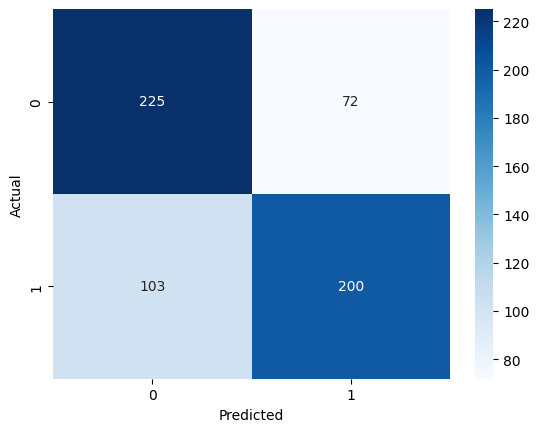

In [14]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
